In [43]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1 Wine Review

In [3]:
file1='winemag-data_first150k.csv'

In [4]:
wine=pd.read_csv(file1)

In [5]:
wine.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## 1 数据可视化和摘要

### 1.1 数据摘要

#### 标称属性

In [6]:
nomial_data=wine.select_dtypes(include=['object'])

In [7]:
for col in nomial_data.columns:
    print("-------------------------------------------------")
    print("{}:\n{}".format(col,nomial_data[col].value_counts()))

-------------------------------------------------
country:
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia       

#### 数值属性

In [8]:
points=wine['points']
price=wine['price']

In [9]:
points_array=np.array(points.dropna())
price_array=np.array(price.dropna())

In [10]:
points_max=np.max(points_array)
points_min=np.min(points_array)
points_1=np.quantile(points_array,0.25)
points_2=np.quantile(points_array,0.5)
points_3=np.quantile(points_array,0.75)

In [11]:
print("points 五数概括：")
print("min: {}\n25%: {}\n50%: {}\n75%: {}\nmax: {}".format(points_min,points_1,points_2,points_3,points_max))

points 五数概括：
min: 80
25%: 86.0
50%: 88.0
75%: 90.0
max: 100


In [12]:
price_max=np.max(price_array)
price_min=np.min(price_array)
price_1=np.quantile(price_array,0.25)
price_2=np.quantile(price_array,0.5)
price_3=np.quantile(price_array,0.75)

In [13]:
print("price 五数概括：")
print("min: {}\n25%: {}\n50%: {}\n75%: {}\nmax: {}".format(price_min,price_1,price_2,price_3,price_max))

price 五数概括：
min: 4.0
25%: 16.0
50%: 24.0
75%: 40.0
max: 2300.0


In [123]:
na = wine.isna().sum()
print('the number of na:')
print(na)

the number of na:
Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64


### 1.2 数据可视化

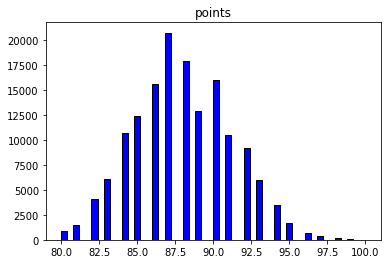

In [15]:
plt.hist(points, bins=50,facecolor="blue", edgecolor="black")
plt.title('points')
plt.show()

Text(0.5, 1.0, 'points')

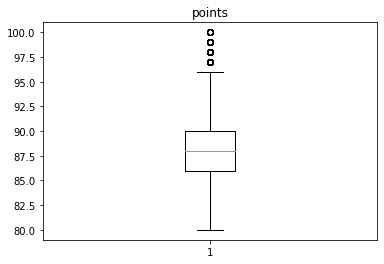

In [16]:
plt.boxplot(points)
plt.title('points')

C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


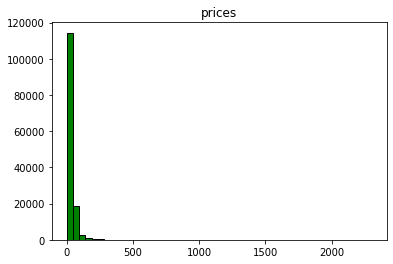

In [17]:
plt.hist(price, bins=50,facecolor="green", edgecolor="black")
plt.title('prices')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


Text(0.5, 1.0, 'price')

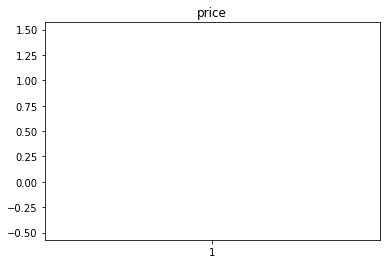

In [18]:
plt.boxplot(price)
plt.title('price')

## 2.数据缺失的处理

### 2.1 缺失数据剔除

In [39]:
price_n1=price.dropna()

Text(0.5, 1.0, 'price')

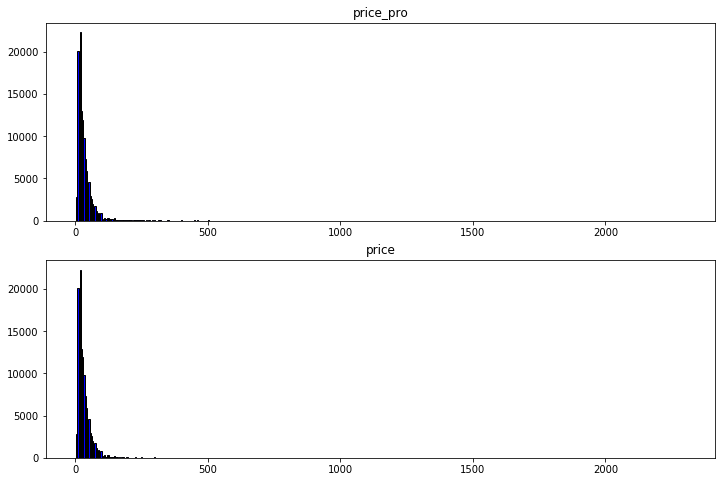

In [88]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.hist(price_n1, bins=500,facecolor="blue", edgecolor="black")
plt.title('price_pro')
plt.subplot(2,1,2)
plt.hist(price, bins=500,facecolor="blue", edgecolor="black")
plt.title('price')

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


Text(0.5, 1.0, 'price')

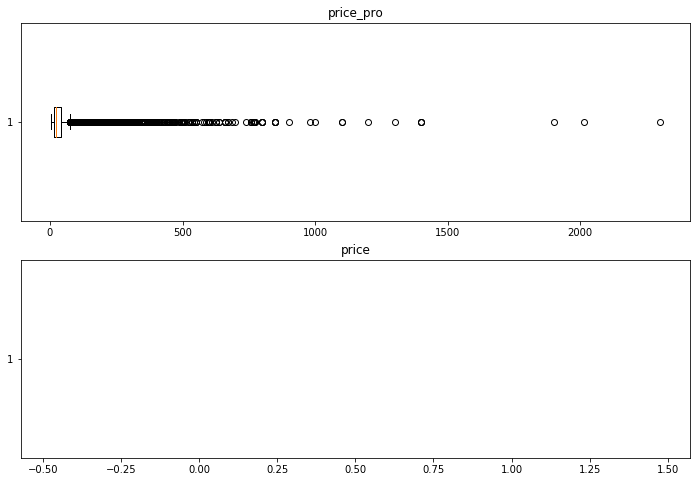

In [84]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.boxplot(price_n1,vert=False)
plt.title('price_pro')
plt.subplot(2,1,2)
plt.boxplot(price,vert=False)
plt.title('price')

### 2.2用最高频率值来填补缺失值

In [52]:
mode_value,_=mode(price)

In [53]:
price_n2=price.fillna(mode_value[0])

Text(0.5, 1.0, 'price')

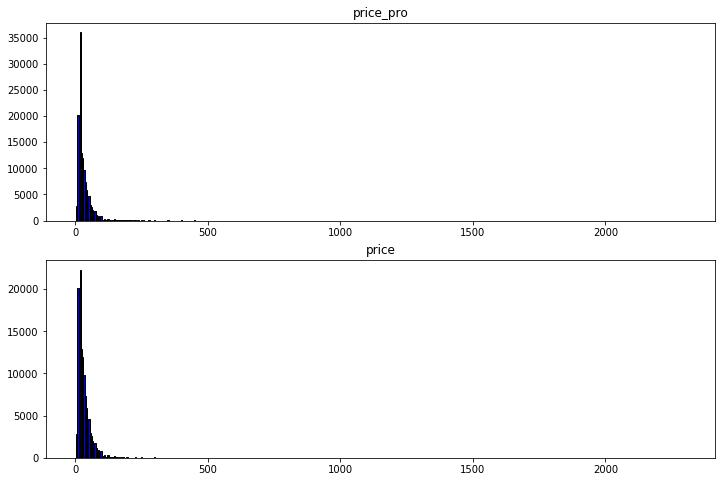

In [87]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.hist(price_n2, bins=500,facecolor="blue", edgecolor="black")
plt.title('price_pro')
plt.subplot(2,1,2)
plt.hist(price, bins=500,facecolor="blue", edgecolor="black")
plt.title('price')

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


Text(0.5, 1.0, 'price')

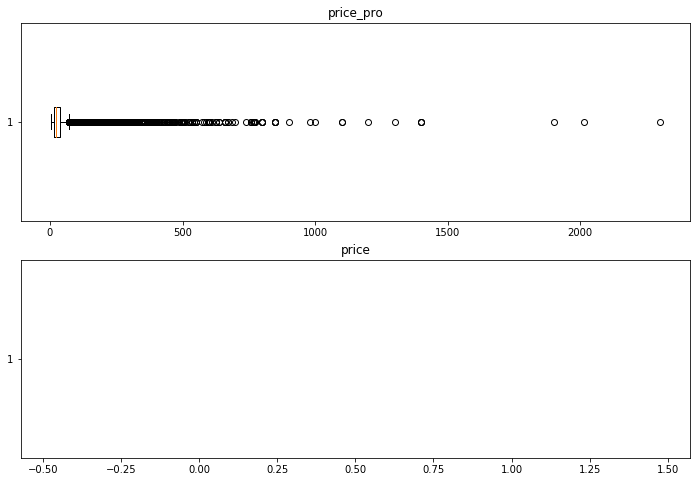

In [83]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.boxplot(price_n2,vert=False)
plt.title('price_pro')
plt.subplot(2,1,2)
plt.boxplot(price,vert=False)
plt.title('price')

### 2.3 中位数

In [72]:
price_n3=price.fillna(np.median(price.dropna()))

Text(0.5, 1.0, 'price')

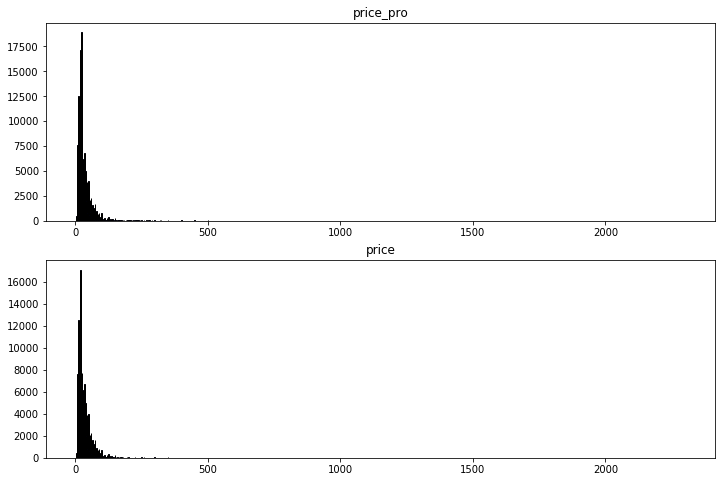

In [86]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.hist(price_n3, bins=1000,facecolor="blue", edgecolor="black")
plt.title('price_pro')
plt.subplot(2,1,2)
plt.hist(price, bins=1000,facecolor="blue", edgecolor="black")
plt.title('price')

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


Text(0.5, 1.0, 'price')

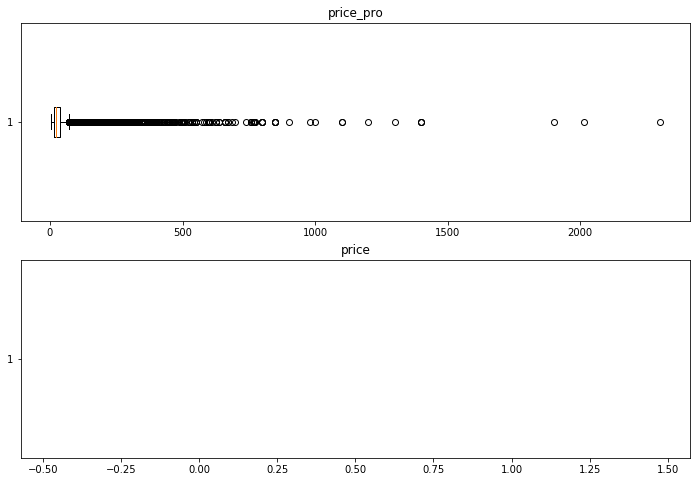

In [82]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.boxplot(price_n3,vert=False)
plt.title('price_pro')
plt.subplot(2,1,2)
plt.boxplot(price,vert=False)
plt.title('price')

### 2.4 相似性

这个不是很会~~

# Part 2 Trending YouTube Video Statistics

In [89]:
file='youtube/CAvideos.csv'

In [90]:
df_2=pd.read_csv(file)

In [91]:
df_2.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [108]:
nomial_data=df_2.select_dtypes(include=['object'])
numberical_data=df_2.select_dtypes(include=['int64'])

## 1 数据可视化和摘要

### 1.1 数据摘要

#### 标称属性

In [110]:
for col in nomial_data.columns:
    print("-------------------------------------------------")
    print("{}:\n{}".format(col,nomial_data[col].value_counts()))

-------------------------------------------------
video_id:
6ZfuNTqbHE8    8
UceaB4D0jpo    8
l_lblj8Cq0o    8
VYOjWnS4cMY    8
MvFcY9rTPx8    7
              ..
ObTqVQx3UFA    1
WTtDjZqg2hU    1
-A7eitZt9OY    1
V75tpX-_Ghc    1
8Pe78lpSfWs    1
Name: video_id, Length: 24427, dtype: int64
-------------------------------------------------
trending_date:
18.16.05    200
18.23.05    200
17.14.12    200
18.07.04    200
18.19.02    200
           ... 
18.02.02    195
18.13.02    195
18.31.01    191
18.01.02    190
18.14.05    171
Name: trending_date, Length: 205, dtype: int64
-------------------------------------------------
title:
Most Popular Violin Covers of Popular Songs 2018 || Best Instrumental Violin Covers 2018               15
Drake - God's Plan (Official Audio)                                                                    15
Bruno Mars,Charlie Puth,Ed Sheeran Best Christmas Songs,Greatest Hits Pop Playlist Christmas 2018      13
Deleted video                                 

#### 数值属性

In [124]:
for col in numberical_data.columns:
    data=numberical_data[col]
    v_max=np.max(data)
    v_min=np.min(data)
    v_25=np.quantile(data,0.25)
    v_5=np.quantile(data,0.5)
    v_75=np.quantile(data,0.75)
    print("--------------------------------------")
    print("{} 五数概括：\nmax: {}\nmin: {}\n25%: {}\n50%: {}\n75%: {}".format(col,v_max,v_min,v_25,v_5,v_75))

--------------------------------------
category_id 五数概括：
max: 43
min: 1
25%: 20.0
50%: 24.0
75%: 24.0
--------------------------------------
views 五数概括：
max: 137843120
min: 733
25%: 143902.0
50%: 371204.0
75%: 963302.0
--------------------------------------
likes 五数概括：
max: 5053338
min: 0
25%: 2191.0
50%: 8780.0
75%: 28717.0
--------------------------------------
dislikes 五数概括：
max: 1602383
min: 0
25%: 99.0
50%: 303.0
75%: 950.0
--------------------------------------
comment_count 五数概括：
max: 1114800
min: 0
25%: 417.0
50%: 1301.0
75%: 3713.0


In [119]:
df_2.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

### 1.2 数据可视化

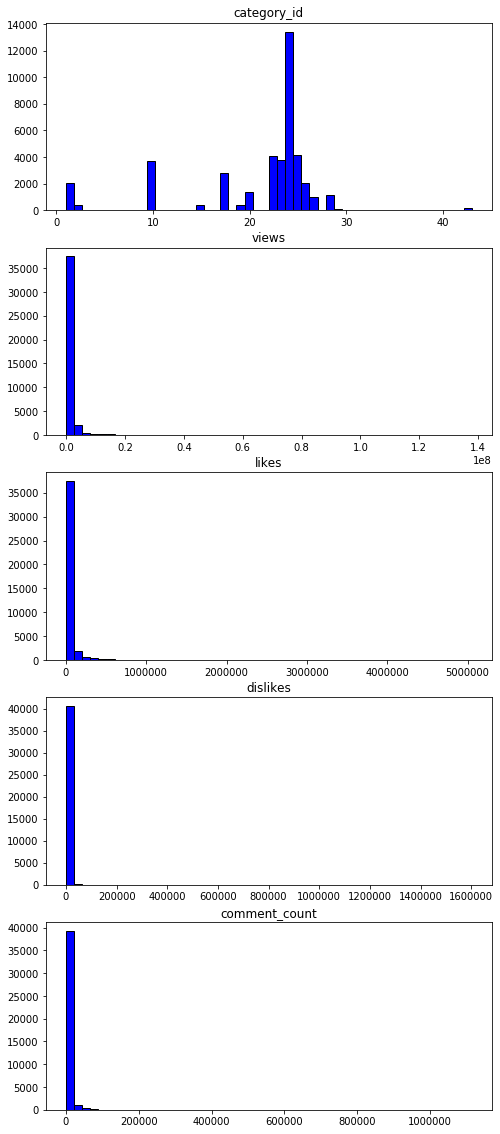

In [133]:
plt.figure(figsize=(8,20))
for i in range(5):
    data=numberical_data[numberical_data.columns[i]]
    plt.subplot(5,1,i+1)
    plt.hist(data, bins=50,facecolor="blue", edgecolor="black")
    plt.title(numberical_data.columns[i])
plt.show()

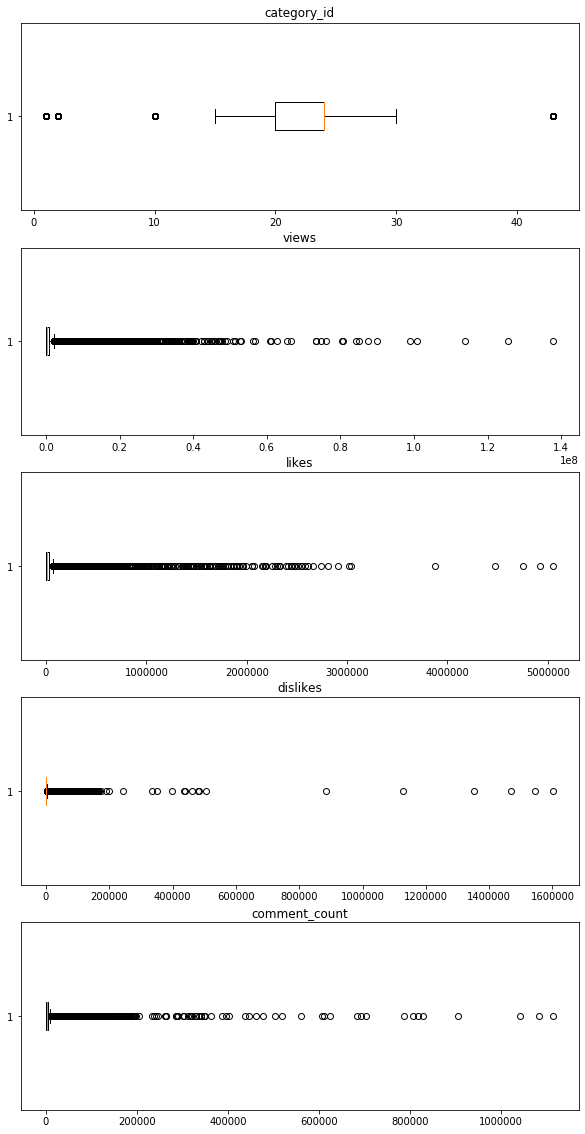

In [135]:
plt.figure(figsize=(10,20))
for i in range(5):
    data=numberical_data[numberical_data.columns[i]]
    plt.subplot(5,1,i+1)
    plt.boxplot(data, vert=False)
    plt.title(numberical_data.columns[i])
plt.show()

## 2 缺失值处理

此数据集数值属性无缺失值，真好~